# Funciones de distribución de probabilidades
## Distribución Uniforme

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Función np.random.uniform(a, b, n) que genera números de forma aleatoria pero siguiendo
# distribución uniforme (todos misma probabilidad) 
a = 1 #Limite inferior
b = 20 #Limite superior
n = 5000000 #Número de muestras
data = np.random.uniform(a, b, n)
data

array([ 8.84345821,  5.14563032,  9.65289944, ..., 13.57130633,
       11.09486511, 19.3976536 ])

(array([499901., 499359., 501681., 500541., 499340., 500683., 499704.,
        499107., 499014., 500670.]),
 array([ 1.00001126,  2.90000987,  4.80000848,  6.70000709,  8.6000057 ,
        10.50000432, 12.40000293, 14.30000154, 16.20000015, 18.09999876,
        19.99999738]),
 <a list of 10 Patch objects>)

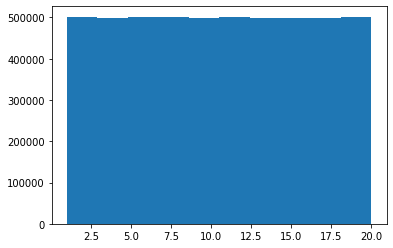

In [14]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [20]:
# Con randn generamos numeros aleatorios de distribución normal
data = np.random.randn(100)
data

array([-0.20541239,  0.71263408, -0.66137077,  0.93506667, -0.88038836,
       -0.36354971,  1.40253151,  1.10776484, -0.73607642,  1.89152016,
        1.00226884,  0.39262055, -1.23911112, -0.65680035, -1.6021695 ,
        0.76603843, -1.13302646,  0.32548878, -0.75329975,  0.78167415,
        0.21600424,  0.72024703, -2.51474893, -0.2070333 , -0.18701789,
        1.93854954, -0.496892  , -0.39322074,  0.42787751,  0.11023581,
        1.20555657, -0.72787515,  0.58614798,  1.21156989, -0.10740658,
       -1.05237552,  1.99493079, -0.82852271, -0.7659373 ,  0.07195438,
        1.30797518, -1.32477047,  1.64901771, -1.00490728, -0.81262619,
       -0.56972207,  0.84153576, -0.33967858, -0.8618689 , -1.42999853,
        0.79357471,  1.35657958,  1.08992169,  0.04922919, -0.45338775,
       -0.51878015,  1.58595222,  1.21913609,  0.82646962, -0.9510084 ,
       -0.00761233, -0.79773145, -0.16295103, -0.78147198, -0.55732926,
        1.31802999, -0.06507914,  0.64155955,  0.16446017, -0.07

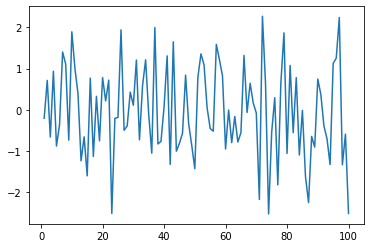

In [23]:
# Con randn generamos numeros aleatorios de distribución normal siendo x el rango de números, Siendo la Y 
# los números generados
x = range(1,101)
plt.plot(x, data)

In [24]:
# Con randn generamos numeros aleatorios de distribución normal
data = np.random.randn(1000000)

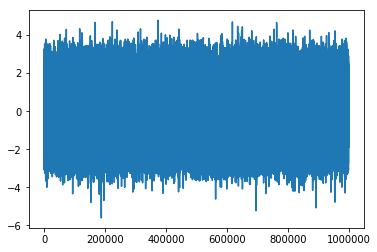

In [31]:
x = range(1,1000001)
plt.plot(x, data)

(array([7.00000e+00, 1.76000e+02, 6.10100e+03, 6.69350e+04, 2.65940e+05,
        3.94335e+05, 2.17925e+05, 4.51050e+04, 3.39500e+03, 8.10000e+01]),
 array([-5.60316173, -4.56527912, -3.52739651, -2.4895139 , -1.45163129,
        -0.41374868,  0.62413394,  1.66201655,  2.69989916,  3.73778177,
         4.77566438]),
 <a list of 10 Patch objects>)

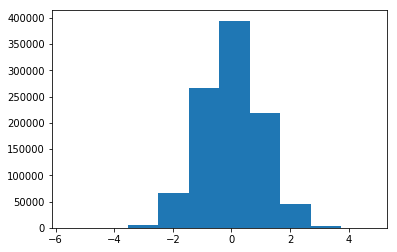

In [28]:
%matplotlib inline
plt.hist(data)

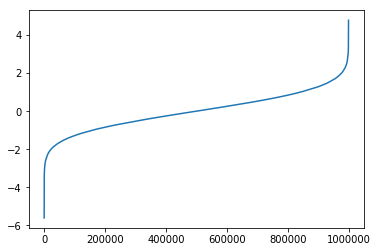

In [32]:
plt.plot(x,sorted(data))

(array([   6.,   32.,  281., 1180., 2576., 3118., 1960.,  711.,  123.,
          13.]),
 array([-5.12280629, -3.11658208, -1.11035788,  0.89586633,  2.90209053,
         4.90831474,  6.91453894,  8.92076315, 10.92698735, 12.93321156,
        14.93943576]),
 <a list of 10 Patch objects>)

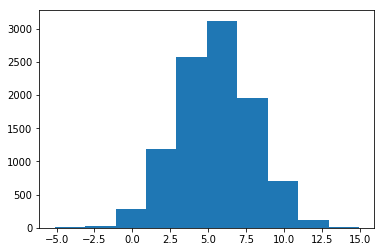

In [34]:
mu = 5.5 #Media
sd = 2.5 #Desviación típica
Z_10000 = np.random.randn(10000)# Normal
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z Teorema central del límite.
plt.hist(data)

In [35]:
data = np.random.randn(2,4)
data

array([[-2.0037831 , -0.21771535, -1.90002375,  0.88870408],
       [-0.93380982, -0.94088418,  0.38366571, -0.0243514 ]])

(array([ 10.,  37., 125., 226., 262., 196.,  96.,  34.,  11.,   3.]),
 array([-2.99737429, -2.32219079, -1.64700729, -0.97182379, -0.29664029,
         0.37854321,  1.05372671,  1.72891021,  2.40409371,  3.07927721,
         3.75446071]),
 <a list of 10 Patch objects>)

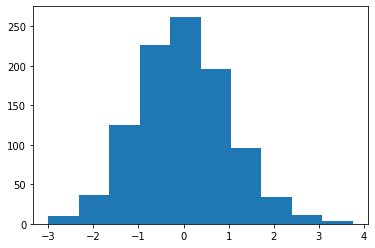

In [37]:
data = np.random.randn(1000)
#x = range(1,101)
plt.hist(data)

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π. 
    

In [42]:
def pi_montecarlo(n, n_exp):
    #n es la cantidad de números aleatorios/intentos que hacemos por experimento
    #n_exp es el número de experimentos que queremos hacer
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()# es uniform por que tienen que tener la misma probabilidad
        y = np.random.uniform(0,1,n).tolist()# es uniform por que tienen que tener la misma probabilidad
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141577999999998


(3.141577999999998, [<matplotlib.lines.Line2D at 0x1795d1bae08>])

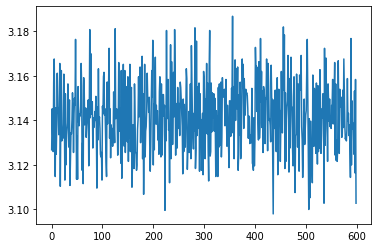

In [48]:
pi_montecarlo(10000,600)

### Dummy Data Sets

In [49]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n), # Normal N(0,1)
        'B' : 1.5 + 2.5 * np.random.randn(n), # Normal con media n=1.5 y desviación tipica 2,5
        'C' : np.random.uniform(5, 32, n) #uniforme
    }
)

In [50]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000909,1.500937,18.497302
std,0.999359,2.501183,7.795854
min,-4.974627,-10.166780,5.000024
25%,-0.673241,-0.185650,11.736313
50%,0.001322,1.502265,18.501368
75%,0.676636,3.189089,25.247977
max,4.953830,12.958492,31.999976


(array([4.30000e+01, 1.29000e+03, 2.15380e+04, 1.34954e+05, 3.37418e+05,
        3.41713e+05, 1.38943e+05, 2.26250e+04, 1.43600e+03, 4.00000e+01]),
 array([-4.97462734, -3.98178164, -2.98893594, -1.99609024, -1.00324454,
        -0.01039884,  0.98244686,  1.97529256,  2.96813826,  3.96098395,
         4.95382965]),
 <a list of 10 Patch objects>)

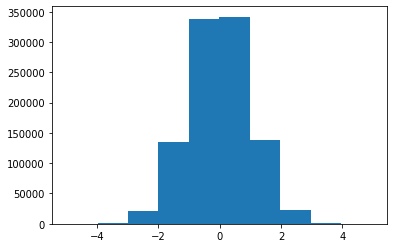

In [51]:
plt.hist(data["A"])

(array([9.20000e+01, 2.34100e+03, 2.69300e+04, 1.37646e+05, 3.16138e+05,
        3.28133e+05, 1.53250e+05, 3.22850e+04, 3.05900e+03, 1.26000e+02]),
 array([-10.1667803 ,  -7.85425306,  -5.54172581,  -3.22919857,
         -0.91667133,   1.39585591,   3.70838316,   6.0209104 ,
          8.33343764,  10.64596488,  12.95849213]),
 <a list of 10 Patch objects>)

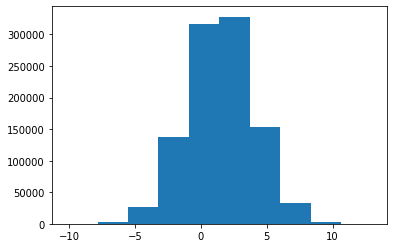

In [52]:
plt.hist(data["B"])

(array([100121., 100103.,  99996., 100045.,  99672., 100182.,  99894.,
        100243.,  99577., 100167.]),
 array([ 5.00002391,  7.70001908, 10.40001425, 13.10000942, 15.80000459,
        18.49999976, 21.19999492, 23.89999009, 26.59998526, 29.29998043,
        31.9999756 ]),
 <a list of 10 Patch objects>)

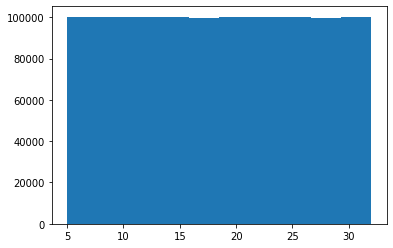

In [53]:
plt.hist(data["C"])

In [54]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [55]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,343.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [56]:
colum_names = data.columns.values.tolist()

In [57]:
a = len(colum_names)
a

21

In [58]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a) # Le generamos el indice a las filas. Muy útil si queremos concatenar data frame.
)

In [59]:
new_data.head()

,Column Name,A,B
42,State,-1.122153,0.560766
43,Account Length,-1.247674,0.613162
44,Area Code,0.572500,0.578453
45,Phone,1.235767,0.033470
46,Int'l Plan,-0.051489,0.923047
